In [1]:
import os
import string
import csv
import gensim
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from sklearn.utils import shuffle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [2]:
import nltk
nltk.download('stopwords')
nltk.download('words')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/varunchopra/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     /Users/varunchopra/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/varunchopra/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/varunchopra/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
stop_words = (stopwords.words('english'))
stopWords = []
for word in stop_words:
    word = word.translate(str.maketrans('','',string.punctuation))
    stopWords.append(word)
print(stopWords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'youre', 'youve', 'youll', 'youd', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'shes', 'her', 'hers', 'herself', 'it', 'its', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'thatll', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', '

In [54]:
genresList = ['blues_lyrics', 'country_lyrics', 'disco_lyrics', 'hiphop_lyrics', 'metal_lyrics', 'pop_lyrics', 'reggae_lyrics', 'rock_lyrics']
genreLyrics = dict()
lyricStopped = {
    'blues': list(),
    'country': list(),
    'disco': list(),
    'hiphop': list(),
    'metal': list(),
    'pop': list(),
    'reggae': list(),
    'rock': list(),
}

lmtzr = WordNetLemmatizer()
porter = PorterStemmer()

header = ['sentence', 'genre']

with open(f'sentences.csv', 'w', newline = "") as file:
    writer = csv.writer(file)
    writer.writerow(header)

for genreName in genresList:
    genre = sorted(os.listdir(f'../genres2/{genreName}'))
    
    for song in genre:
        
        if song == '.DS_Store':
            continue
            
        path = f'../genres2/{genreName}/{song}'
        songName = open(path, 'r')
        lyric = songName.read().lower()

        lyric = lyric.translate(str.maketrans('','',string.punctuation))

        paragraphs = [p for p in lyric.split('\n') if p]
        for paragraph in paragraphs:
            sentence = sent_tokenize(paragraph)    
            lyricStopped[genreName.replace('_lyrics','')].append(sentence)

    with open(f'sentences.csv', 'a', newline = "") as file:
        writer = csv.writer(file)
        for key, value in lyricStopped.items():
            for g in value:
                g = str(g)
                g = g.replace('[\'','')
                g = g.replace('\']','')
                words = g.split()
                
                words = [w for w in words if not w in stopWords]
                words = [lmtzr.lemmatize(x) for x in words]
                words = [porter.stem(x) for x in words]
                g = ''
                
                for word in words:
                    g += word + ' '
                    
                writer.writerow([g, key])
print(g)

ive wait 


In [5]:
dataset = pd.read_csv('sentences.csv')
X = dataset.iloc[:, 0].values
y = dataset.iloc[:, 1].values

print(X)
print(y)

['true love goneha play fool ' 'true love goneha play fool '
 'im turnin tabl ' ... 'noth realli matter ' 'noth realli matter '
 'way wind blow ']
['blues' 'blues' 'blues' ... 'rock' 'rock' 'rock']


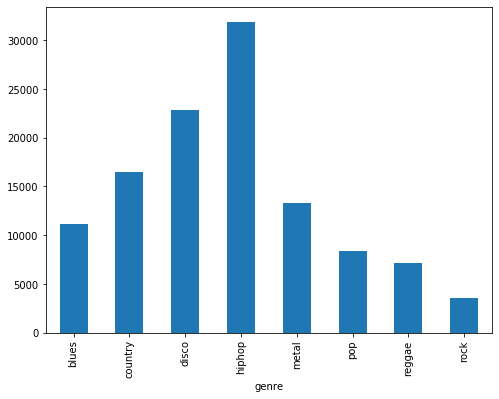

In [6]:
fig = plt.figure(figsize=(8,6))
dataset.groupby('genre').sentence.count().plot.bar(ylim=0)
plt.show()

In [7]:
sentence = X[:]
sentence.shape

(115395,)

In [8]:
le = preprocessing.LabelEncoder()
sent_encoded=le.fit_transform(sentence.astype(str))
sent_encoded = np.reshape(sent_encoded,(-1,1))
sent_encoded.shape

(115395, 1)

In [9]:
features = np.row_stack(sent_encoded)
print(features.shape)
y.shape

(115395, 1)


(115395,)

## Naive Bayes 

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size = 0.25, random_state = 15)

In [56]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [57]:
y_pred = classifier.predict(X_test)

In [58]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[   0    0    0 2881    0    0    0    0]
 [   0    0    0 4151    0    0    0    0]
 [   0    0    0 5703    0    0    0    0]
 [   0    0    0 7953    0    0    0    0]
 [   0    0    0 3351    0    0    0    0]
 [   0    0    0 2138    0    0    0    0]
 [   0    0    0 1798    0    0    0    0]
 [   0    0    0  874    0    0    0    0]]


In [59]:
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.2756767998890776


## Logistic Regression

In [60]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train, y_train)
score = classifier.score(X_test, y_test)

print("Accuracy:", score)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy: 0.2685708343443447


In [61]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(86546, 1) (86546,)
(28849, 1) (28849,)


## LSTM

In [62]:
from keras.models import Sequential
from keras import layers
from keras.layers import Embedding, SpatialDropout1D, LSTM, Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.preprocessing import LabelEncoder

dataset = pd.read_csv('sentences.csv')
X = dataset.iloc[:, 0].values
y = dataset.iloc[:, 1].values

encoder = LabelEncoder()
y_enc = encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(features, y_enc, test_size = 0.25, random_state = 15)

# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 100

model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X_train.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(8, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 5
batch_size = 64

history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,validation_data=(X_test, y_test),callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 86546 samples, validate on 28849 samples
Epoch 1/5
86546/86546 [==============================] - 63s 733us/step - loss: 0.8505 - accuracy: 0.7173 - val_loss: 0.2140 - val_accuracy: 0.9365
Epoch 2/5
86546/86546 [==============================] - 65s 750us/step - loss: 0.1505 - accuracy: 0.9534 - val_loss: 0.1451 - val_accuracy: 0.9565
Epoch 3/5
86546/86546 [==============================] - 64s 738us/step - loss: 0.1037 - accuracy: 0.9659 - val_loss: 0.1291 - val_accuracy: 0.9574
Epoch 4/5
86546/86546 [==============================] - 62s 722us/step - loss: 0.0921 - accuracy: 0.9669 - val_loss: 0.1245 - val_accuracy: 0.9577
Epoch 5/5
86546/86546 [==============================] - 64s 740us/step - loss: 0.0876 - accuracy: 0.9670 - val_loss: 0.1217 - val_accuracy: 0.9592


In [70]:
accr = model.evaluate(X_test,y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

28849/28849 [==============================] - 1s 19us/step
Test set
  Loss: 0.122
  Accuracy: 0.959


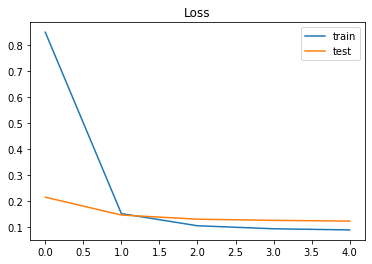

In [71]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

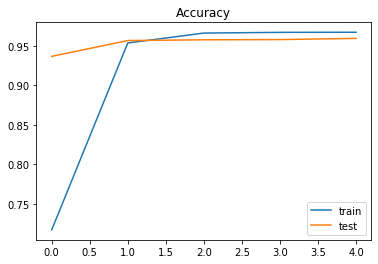

In [72]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();

In [108]:
# Prediction
testFile = open('../genres2/hiphop_lyrics/hiphop.00034.txt', 'r')
testLyrics = testFile.read().lower()
print(testLyrics)

i gotta funky funky rhyme with a funky style
i gotta funky funky rhyme with a funky funky style
i gotta funky rhyme... wit a funky funky style
i gotta funky rhyme... wit a funky funky style
pete's rickety rocket was my favorite cartoon
after marriage the honeymoon
i'll be damn gag me with a spoon
who loves popeye, alice the goon
ladies let your body flow
send a chill up your spine like an eskimo
here's a backstage pass to a funky show
come give me a kiss under the missle toe
greg nice, my lifes like a fairy tale
orca, was a great big whale
i knew a fat girl who broke the scale
you won't tell, i won't tell
clientele i must excel
took a little test, i passed then failed
breaks... huh, no need to hit'em
skins, ya got 'em - i wanna get wit 'em!
nice & smooth is funky
also hip-hop junkies
all we wanna do...
is unh unh and you...
nice & smooth is funky
also hip-hop junkies
all we wanna do...
is unh unh, oh yeah
yo, i gotta funky funky rhyme wit a funky funky style
funky rhyme wit a funky fun

In [109]:
testLyrics = testLyrics.translate(str.maketrans('','',string.punctuation))
paragraphs = [p for p in testLyrics.split('\n') if p]
print(paragraphs)
# sentence = sent_tokenize(paragraphs)
# print(sentence)

['i gotta funky funky rhyme with a funky style', 'i gotta funky funky rhyme with a funky funky style', 'i gotta funky rhyme wit a funky funky style', 'i gotta funky rhyme wit a funky funky style', 'petes rickety rocket was my favorite cartoon', 'after marriage the honeymoon', 'ill be damn gag me with a spoon', 'who loves popeye alice the goon', 'ladies let your body flow', 'send a chill up your spine like an eskimo', 'heres a backstage pass to a funky show', 'come give me a kiss under the missle toe', 'greg nice my lifes like a fairy tale', 'orca was a great big whale', 'i knew a fat girl who broke the scale', 'you wont tell i wont tell', 'clientele i must excel', 'took a little test i passed then failed', 'breaks huh no need to hitem', 'skins ya got em  i wanna get wit em', 'nice  smooth is funky', 'also hiphop junkies', 'all we wanna do', 'is unh unh and you', 'nice  smooth is funky', 'also hiphop junkies', 'all we wanna do', 'is unh unh oh yeah', 'yo i gotta funky funky rhyme wit a 

In [110]:
# from keras.preprocessing.text import Tokenizer
# from keras.preprocessing.sequence import pad_sequences
# predictedLabels = []
# tk = Tokenizer()
# from statistics import mode

# labels = ['blues', 'country', 'disco', 'hiphop', 'metal','pop','reggae', 'rock']

# for sentence in paragraphs:
# #     sentence = sent_tokenize(para)
# #     g = str(sentence)
# #     g = g.replace('[\'','')
# #     g = g.replace('\']','')
#     words = sentence.split()
# #     print(words)

#     words = [w for w in words if not w in stopWords]
#     words = [lmtzr.lemmatize(x) for x in words]
#     words = [porter.stem(x) for x in words]
#     sentence = ''

#     for word in words:
#         sentence += word + ' '
#     print(sentence)
    
#     tk.fit_on_texts(sentence)
#     index_list = tk.texts_to_sequences(sentence)
#     padded = pad_sequences(index_list, maxlen=1)
#     pred = model.predict(padded)
    
#     print(pred)
# #     print(pred, labels[np.argmax(pred)])
# #     predictedLabels.append(labels[np.argmax(pred)])
# # print(mode(predictedLabels))

In [111]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
predictedLabels = []
tk = Tokenizer()
from statistics import mode

labels = ['blues', 'country', 'disco', 'hiphop', 'metal','pop', 'reggae', 'rock']

for para in paragraphs:
    sentence = sent_tokenize(para)
    
    tk.fit_on_texts(sentence)
    index_list = tk.texts_to_sequences(sentence)
    padded = pad_sequences(index_list, maxlen=1)
    pred = model.predict(padded)
    
#     print(pred)
    print(labels[np.argmax(pred)])
    predictedLabels.append(labels[np.argmax(pred)])
print('Predicted Output: ' + mode(predictedLabels))

hiphop
hiphop
hiphop
hiphop
disco
blues
metal
rock
hiphop
metal
metal
hiphop
metal
rock
disco
hiphop
rock
hiphop
pop
blues
rock
hiphop
disco
blues
rock
hiphop
rock
rock
hiphop
hiphop
hiphop
hiphop
reggae
hiphop
country
hiphop
hiphop
hiphop
rock
disco
disco
rock
reggae
hiphop
metal
hiphop
metal
hiphop
pop
pop
rock
hiphop
rock
rock
rock
hiphop
hiphop
rock
rock
blues
hiphop
metal
rock
blues
pop
reggae
rock
rock
blues
hiphop
Predicted Output: hiphop
